In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

# 載入手寫數字資料集
digits = load_digits()
X = digits.data
y = digits.target

print('X shape:', X.shape)

X shape: (1797, 64)


<Figure size 640x480 with 0 Axes>

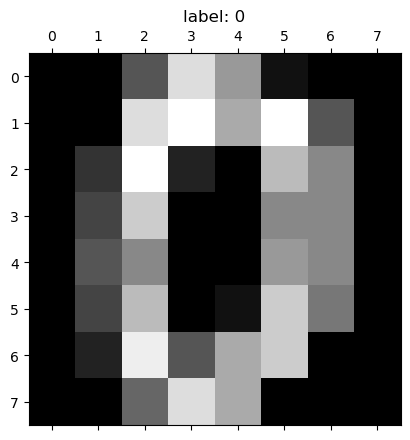

In [2]:
import matplotlib.pyplot as plt

plt.gray()
plt.matshow(X[0].reshape(8,8))
plt.title(f'label: {y[0]}')
plt.show()

## PCA

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, iterated_power=1)
train_reduced = pca.fit_transform(X)

print('PCA方差比: ',pca.explained_variance_ratio_)
print('PCA方差值:',pca.explained_variance_)

PCA方差比:  [0.14803471 0.13536574]
PCA方差值: [177.95958509 162.72961398]


In [9]:
from sklearn.decomposition import PCA

# 將主成分個數設為 1 至 64，計算累積方差比
n_components = range(1, 65)
cumulative_variance_ratio_list = []
variance_ratio_list = []
for n in n_components:
    pca = PCA(n_components=n)
    pca.fit(X)
    variance_ratio_list.append(np.sum(pca.explained_variance_ratio_))
    cumulative_variance_ratio_list.append(np.sum(pca.explained_variance_ratio_))

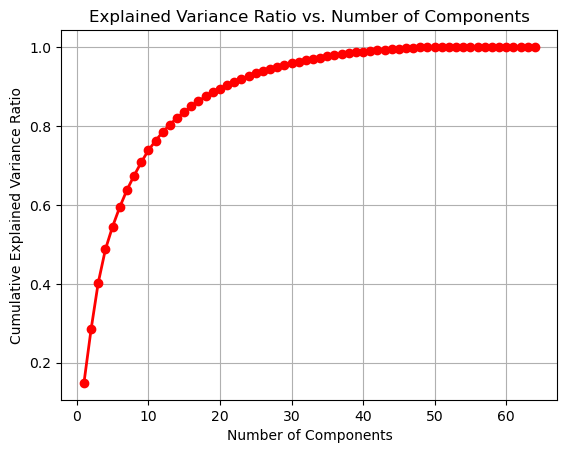

In [10]:
import matplotlib.pyplot as plt

# 繪製累積方差比圖表
plt.plot(n_components, cumulative_variance_ratio_list, 'ro-', linewidth=2)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid()
plt.show()

/var/folders/zl/457gnmjx74z81t9knnglchvm0000gn/T/ipykernel_17072/333148764.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


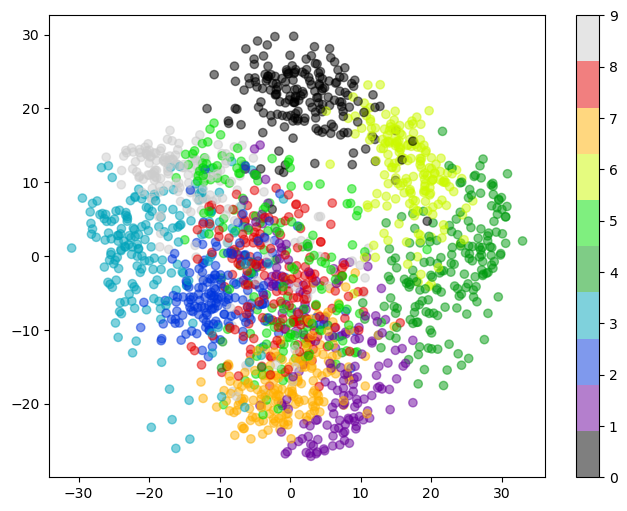

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(train_reduced[:, 0], train_reduced[:, 1], c=y, alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar()
plt.show()

## t-SNE降維
- n_components: 降維之後的維度
- perplexity: 最佳化過程中考慮鄰近點的多寡，default 30，原始paper建議5-50
- n_iter: 迭代次數，預設1000

In [12]:
from sklearn.manifold import TSNE

tsneModel = TSNE(n_components=2, random_state=42)
X_embedded = tsneModel.fit_transform(X)

/var/folders/zl/457gnmjx74z81t9knnglchvm0000gn/T/ipykernel_17072/2314636096.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


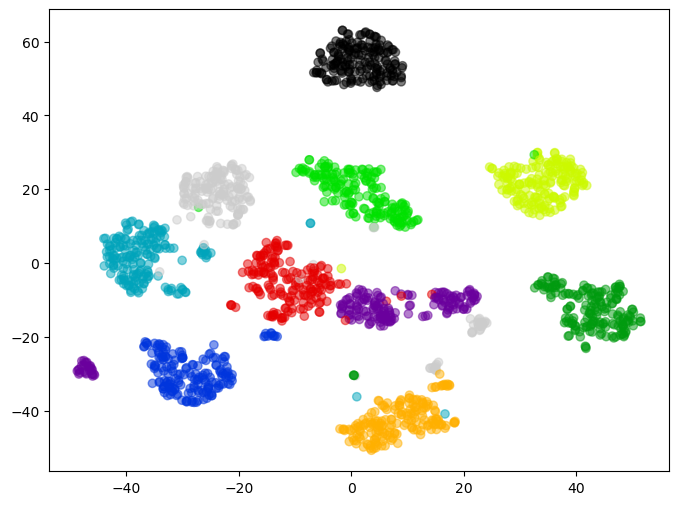

In [13]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
# 加入圖例
legend1 = plt.legend(*scatter.legend_elements(), title="Digits",
                     bbox_to_anchor=(1.03, 0.8), loc='upper left')
plt.gca().add_artist(legend1)
plt.show()

## K-means

In [14]:
from sklearn.cluster import KMeans

kmeansModel = KMeans(n_clusters=10, random_state=42)
clusters_pred = kmeansModel.fit_predict(X_embedded)

/Users/yilintsai/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/var/folders/zl/457gnmjx74z81t9knnglchvm0000gn/T/ipykernel_17072/1100202522.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


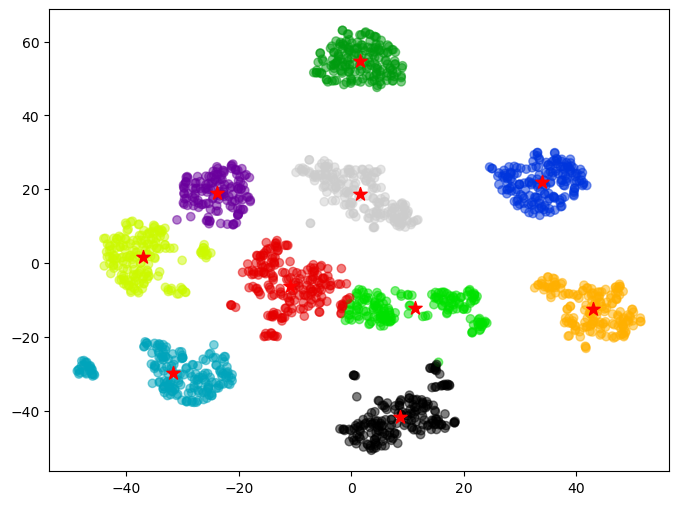

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=clusters_pred, alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

# 加入圖例
legend1 = plt.legend(*scatter.legend_elements(), title="Digits",
                     bbox_to_anchor=(1.03, 0.8), loc='upper left')
plt.gca().add_artist(legend1)
plt.scatter(kmeansModel.cluster_centers_[:, 0], kmeansModel.cluster_centers_[:, 1], s=100, c="r",marker='*')
plt.show()